## Lab-proyecto 3

* Lohana S√°nchez Benavides - 2017239552
* Mois√©s Salguero Morales - 2017238398


En este Lab-proyecto se analizar√°n diferentes tipos de modulaci√≥n de Amplitud (AM). Como la modulaci√≥n de doble banda lateral con portadora suprimida DSB-SC y DSB-LC. Para esto se haran pruebas frecuencias y amplitudes predefinidas y observar√° gr√°ficas en tiempo y frecuencia para los diversos an√°lisis. 

## Modulaci√≥n AM DSB-SC

En esta secci√≥n se analiza una modulaci√≥n de doble banda lateral con portadora suprimida (AM-DSB-SC). En este caso se realizar√° una funci√≥n que module y otra que demodule la se√±al con el mensaje. Se presentan tanto para la secci√≥n de modulaci√≥n como demodulaci√≥n gr√°ficas en el tiempo y en la frecuencia para las se√±ales moduladora _m_, portadora _c_ y la modulada _s_. 
Se usaron frecuencias _f<sub>m_=50, _f<sub>c_=500 y amplitudes _A<sub>c_=1 y _A<sub>m_=1.



Primeramente se importaron todas las librer√≠as que se utilizar√°n a lo largo de la notebook 

In [2]:
# importaci√≥n de librer√≠as 

import matplotlib.pyplot as plt
import math
import numpy as np
import scipy as sp
from scipy import signal 
from scipy import linalg
import scipy.constants as spc
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import butter, lfilter, freqz

### Funci√≥n para modulaci√≥n 

En esta secci√≥n se presenta la funci√≥n que modula la se√±al. La se√±al moduladora se multiplica por la se√±al portadora, teniendo como resultado la se√±al modulada. Se grafican en esta funci√≥n 7 curvas: la se√±al _m_, la se√±al _c_, y la se√±al _s_ en tiempo y frecuencia en su respectivo orden, y finalmente las 3 se√±ales en el tiempo en un mismo gr√°fico.

Para la parte de modulaci√≥n con doble banda lateral con portadora suprimida, la se√±al moduladura, portadora y modulada se tiene una forma como la siguiente:

* _m(t)_ = _cos(2œÄf<sub>m</sub>‚ãÖ t)_
* _c(t)_ = _A<sub>c</sub>*cos(2œÄf<sub>c</sub>‚ãÖ t)_
* _s(t)_ = _m(t)‚ãÖ c(t)_



In [ ]:
def modulation(fm, fc, ac):
  # definici√≥n de funciones matem√°ticas 

  # espacio entre muestras
  s = 1/(fc*200)

  # puntos de muestra
  t = np.arange(0, 30/fc, s)     # puntos en t
  tf = np.arange(0, 100/fc, s)   # puntos en t para transformar a frecuencia 

  # numero muestras para frecuencia 
  N = len(tf)
  frec = fftfreq(N, s)           # se√±al de frecuencia 
  mt = np.cos(2*np.pi*fm*t)      # se√±al moduladora en el tiempo
  portadora = ac*np.cos(2*np.pi*fc*t) # se√±al portadora  en el tiempo
  modulada = mt*portadora             # se√±al modulada en el tiempo


  %matplotlib inline
    #(\u03C9)
  # se√±al moduladora en el tiempo
  fig, (ax1, ax2) = plt.subplots(2)
  ax1.plot(t, mt, label = "modulating")
  ax1.set_ylabel("Amplitude")
  ax1.set_xlabel("time (s)")
  ax1.set_title('Modulating signal') 

  #se√±al moduladora en frecuencia 
  mtf= np.cos(2*np.pi*fm*tf)      # se√±al moduladora en el tiempo para frecuencia 
  mf = fft(mtf)                   # moduladora en frecuencia
  ax2.plot(frec, 1/N * np.abs(mf))
  ax2.set_xlim([-1000, 1000])
  ax2.set_ylabel("Amplitude")
  ax2.set_xlabel("frecuency (Hz)")
  #ax2.set_title('Modulating signal') 
  plt.tight_layout()
  plt.show()

  # Se√±al portadora en tiempo 
  fig, (ax1, ax2) = plt.subplots(2)
  ax1.plot(t, portadora, label = "Carrier")
  ax1.set_ylabel("Amplitude")
  ax1.set_xlabel("time (s)")
  ax1.set_title('Carrier signal') 
  plt.tight_layout()

  #se√±al portadora en frecuencia 
  portadora_f = ac*np.cos(2*np.pi*fc*tf) # se√±al portadora  para frecuencia 
  pf = fft(portadora_f)                   # portadora en frecuencia
  ax2.plot(frec, 1/N * np.abs(pf))
  ax2.set_xlim([-1000, 1000])
  ax2.set_ylabel("Amplitude")
  ax2.set_xlabel("frecuency (Hz)")
  #ax2.set_title('Carrier signal') 
  plt.tight_layout()
  plt.show()

  # se√±al modulada en el tiempo 
  fig, (ax1, ax2) = plt.subplots(2)
  ax1.plot(t, modulada , label = "modulated")
  ax1.set_ylabel("Amplitude")
  ax1.set_xlabel("time (s)")
  ax1.set_title('Modulated signal') 
  

  # se√±al modulada en frecuencia 
  modulada_tf = mtf*portadora_f # se√±al modulada para frecuencia 
  modulada_f = fft(modulada_tf)                   # portadora en frecuencia
  ax2.plot(frec, 1/N * np.abs(modulada_f))
  ax2.set_xlim([-1000, 1000])
  ax2.set_ylabel("Amplitude")
  ax2.set_xlabel("frecuency (Hz)")
  #ax2.set_title('Modulated signal') 
  plt.tight_layout()
  plt.show()

  # Vista de tres se√±ales en el tiempo 
  plt.plot(t, mt , label = "modulating")
  plt.plot(t, portadora , label = "carrier")
  plt.plot(t, modulada , label = "modulated")
  plt.legend()
  plt.ylabel("Amplitude")
  plt.xlabel("time (s)")
  plt.title('Modulation signals') 
  plt.show()

  return portadora, portadora_f, modulada, modulada_tf, t, tf, frec, N


En esta secci√≥n se llama la funci√≥n encargada de modular la se√±al y generar las curvas respectivas. Se utiliz√≥ en este caso variables con valores _f<sub>m_=50, _f<sub>c_=500 y _A<sub>c_=1. 

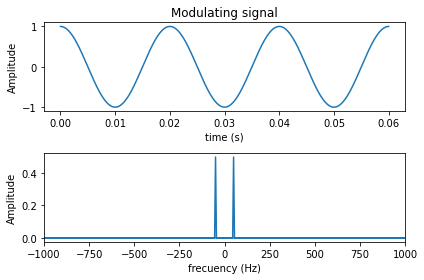

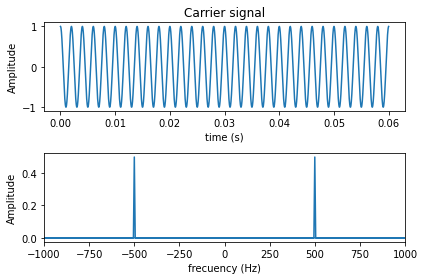

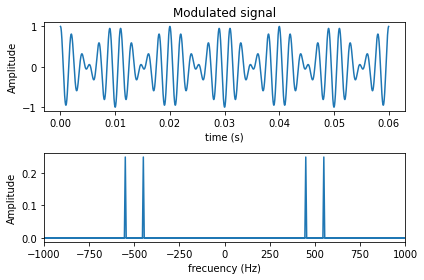

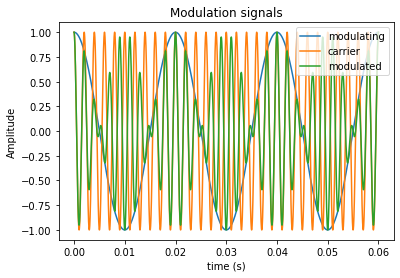

In [ ]:
# valor de frecuencias y amplitud
fm = 50
fc = 500
A = 1

# Llamada a la funci√≥n moduladora para obtener gr√°ficas 
[portadora, portadora_f, modulada, modulada_tf, t, tf, frec, N] = modulation(fm, fc, A)

Las se√±ales de la portadora y la moduladora, en el tiempo, tienen forma cosenoidales, por lo que en el dominio de la frecuencia se tienen deltas de dirac con una amplitud de 0.5, ya que las amplitudes utilizadas en el tiempo son de 1. Por otro lado. Las frecuencias donde se ubican los deltas, son _¬±f<sub>m_ (¬±50) para la moduladora y _¬±f<sub>c_ (¬±500) para la portadora que es las frecuencias que se les dio, resepectivamente.

La se√±al modulada, en el tiempo, es una combinacion de dos cosenos multiplic√°ndose, pero por identidades trigonom√©tricas se puede separar a una suma de cosenos con la mitad de amplitud. Se puede observar, en la gr√°fica de la se√±al modulada, se componen de dos frecuencias, la envolvente que tiene una frecuencia baja y una amplitud de 0.5, mientras que la frecuencia alta est√° dentro de la se√±al, el mensaje a transmitir est√° en la envolvente y se observa que se transmite de forma correcta debido a su gran similitud con la moduladora.

En la frecuencia, la amplitud de los deltas son de 0.25 y las frecuencias se ubican en _¬±(f<sub>m</sub>+f<sub>c</sub>)(¬±550)_ y en _¬±(f<sub>m</sub>-f<sub>c</sub>)(¬±450)_. 

### Demodulaci√≥n AM DSB-SC 

En esta secci√≥n se presenta la funci√≥n demoduladora, la cual toma la se√±al modulada en el tiempo y la multiplica por la portadora para obtener la se√±al original, sin embargo, la se√±al final tiene otras componentes de alta frecuencia que no pertenecen al mensaje original, y se desean eliminar. Para esto se utiliza un filtro pasa baja que limpia la se√±al para obtener el resultado esperado. 

Para recuperar el mensaje original se debe multiplicar la se√±al modulada recibida por la se√±al portadora con una sincronizaci√≥n coherente.

* _s(t)c(t)_ = _A<sub>c</sub>cos<sup>2</sup>(2œÄf<sub>c</sub>‚ãÖ t)cos(2œÄf<sub>m</sub>‚ãÖ t)_

Despu√©s de aplicar identidades trigonometricas la forma de la se√±al se describe de la siguiente manera:
* _s(t)c(t)_ = _A<sub>c</sub>/2cos(2œÄf<sub>m</sub>‚ãÖ t)+A<sub>c</sub>/4(cos(2œÄt(f<sub>m</sub>+2f<sub>c</sub>)+(cos(2œÄt(f<sub>m</sub>-2f<sub>c</sub>))_

Lo anterior indica que se tienen 3 cosenos involucrados en la se√±al.

La funci√≥n demodulacion toma como par√°metros la se√±al portadora, una se√±al portadora con m√°s datos para convertir y graficar en frecuencia, la se√±al modulada, la se√±al modulada para convertir y graficar en frecuencia, el tiempo de las muestras, el tiempo para convertir a frecuencia, el vector de frecuencias y el n√∫mero de datos. 

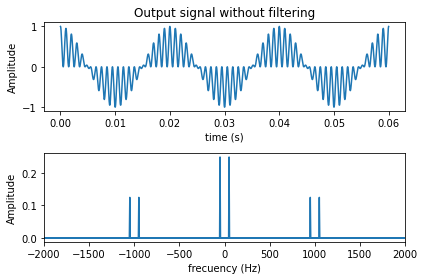

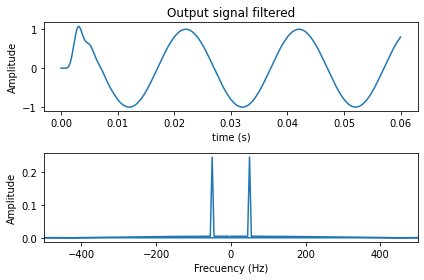

In [ ]:
def demodulacion(portadora, portadora_f, modulada, modulada_tf, t, tf, frec, N): 
  final = modulada*portadora

  # se√±al de salida sin filtrar en el tiempo 
  fig, (ax1, ax2)  = plt.subplots(2)
  ax1.plot(t, final, label = "Output without filtering")
  ax1.set_ylabel("Amplitude")
  ax1.set_xlabel("time (s)")
  ax1.set_title('Output signal without filtering') 

  # se√±al de salida sin filtrar en la frecuencia 
  semifinal_ft = modulada_tf*portadora_f  # se√±al portadora  para frecuencia 
  sf = fft(semifinal_ft)                   # portadora en frecuencia
  ax2.plot(frec, 1/N * np.abs(sf))
  ax2.set_xlim([-2000, 2000])
  ax2.set_ylabel("Amplitude")
  ax2.set_xlabel("frecuency (Hz)")
  #ax2.set_title('Output signal without filtering in frecuency') 
  plt.tight_layout()
  plt.show()

  # filtrado de la se√±al 
  sos= signal.butter(10, 50,'low', fs=10000, output='sos')
  y = signal.sosfilt(sos, semifinal_ft)
  
  # graficaci√≥n de se√±al final filtrada en t
  fig, (ax1, ax2) = plt.subplots(2)
  ax1.plot(tf[:len(t)], 2*y[:len(final)])
  ax1.set_ylabel("Amplitude")
  ax1.set_xlabel("time (s)")
  ax1.set_title('Output signal filtered') 

  # grafica se√±al final filtrada en frec
  m=fft(y)
  ax2.plot(frec, 1/N * np.abs(m))
  ax2.set_xlim([-500, 500])
  ax2.set_ylabel("Amplitude")
  ax2.set_xlabel("Frecuency (Hz)")
  #ax2.set_title('Output signal filtered in frecuency') 
  plt.tight_layout()
  plt.show()  
  
demodulacion(portadora, portadora_f, modulada, modulada_tf, t, tf, frec, N)

En el dominio de la frecuencia, como se observa anteriormente, se tienen 4 deltas de dirac con una amplitud de 0.125 ubicados en las frecuencias ¬±(f<sub>m</sub>-2f<sub>c</sub>) (¬±1050) y ¬±(f<sub>m</sub>+2f<sub>c</sub>) (¬±950), mientras que el par de deltas de dirac ubicados en el centro tiene una frecuencia de (f<sub>m</sub>) (¬±50) y una amplitud de 0.25, este correponde al mensaje que se desea recuperar con un filtro pasobajo.

Como se observa, la se√±al de salida sin filtrar tiene una forma sinusoidal de baja frecuencia igual que la se√±al moduladora, en la gr√°fica de frecuencia se observa que tiene la misma frecuencia de la se√±al moduladora, de 50Hz, sin embargo, tiene la componente de alta frecuencia de la se√±al portadora. Despu√©s del filtro pasabajas, se observa en la se√±al filtrada en el tiempo como sale una se√±al muy similar a la modulada, y en el dominio de la frecuencia se observa que su frecuencia es de 50Hz, igual que la moduladora original, por lo que el objetivo de modular y demodular se cumpli√≥ exitosamente. 



## Control de errores con inserci√≥n de ‚àÜùúî y ùúÉ en DSC-SC. 

En esta secci√≥n se usar√° el bloque demodulador de la secci√≥n anterior para insertar errores en la se√±al portadora como un cambio de frecuencia ‚àÜùúî y una fase ùúÉ, despues se analizar√°n los resultados y c√≥mo afectan estos nuevos valores introducidos a la se√±al recuperada. 

La ecuaci√≥n de la se√±al portadora en el tiempo _C(t)_ queda como: 
- _c(t)_ = _A<sub>c</sub>*cos((ùúî<sub>c</sub> + ‚àÜùúî )‚ãÖ t +ùúÉ)_

A continuaci√≥n el bloque de demodulaci√≥n modificado.

In [ ]:
def demodulacion_mod(modulada, modulada_tf, t, tf, frec, N, cambio_f, desface, fc, A): 
  portadora_mod = A*np.cos(2*np.pi*(fc + cambio_f)*t + desface) # se√±al portadora  en el tiempo
  portadora_mod_f = A*np.cos(2*np.pi*(fc + cambio_f)*tf + desface) # se√±al portadora  en el tiempo para graficar en frec

  final = modulada*portadora_mod

  # se√±al de salida sin filtrar en el tiempo 
  fig, (ax1, ax2) = plt.subplots(2)
  ax1.plot(t, final, label = "Output without filtering")
  ax1.set_ylabel("Amplitude")
  ax1.set_xlabel("time (s)")
  ax1.set_title('Output signal') 

  # se√±al de salida sin filtrar en la frecuencia 
  semifinal_ft = modulada_tf*portadora_mod_f  # se√±al portadora  para frecuencia 
  sf = fft(semifinal_ft)                   # portadora en frecuencia
  ax2.plot(frec, 1/N * np.abs(sf))
  ax2.set_xlim([-2000, 2000])
  ax2.set_ylabel("Amplitude")
  ax2.set_xlabel("frecuency (Hz)")
  #ax2.set_title('Carrier signal') 
  plt.tight_layout()
  plt.show()

  # aplicaci√≥n del filtro a se√±al de salida 
  sos= signal.butter(10, 50,'low', fs=10000, output='sos')
  y = signal.sosfilt(sos, semifinal_ft)

  # gr√°fica de se√±al de salida en t
  fig, (ax1, ax2) = plt.subplots(2)
  ax1.plot(tf[:len(t)], 2*y[:len(final)])
  ax1.set_ylabel("Amplitude")
  ax1.set_xlabel("time (s)")
  ax1.set_title('Filtered output signal') 

  # grafica en frec de se√±al de salida
  m=fft(y)
  ax2.plot(frec, 1/N * np.abs(m))
  ax2.set_xlim([-500, 500])
  ax2.set_ylabel("Amplidute")
  ax2.set_xlabel("Frecuency (Hz)")
  plt.tight_layout()
  plt.show()  

Una vez creado el bloque, se definieron parametros de ‚àÜùúî y ùúÉ diversos para realizar pruebas cambiando uno u otro de forma exclusiva y ver c√≥mo afecta la inserci√≥n de estos valores a la se√±al recuperada. 

En el primer caso se va a cambiar solamente el desface, se tiene un valor de _‚àÜùúî=0 y ùúÉ=0.5_: 

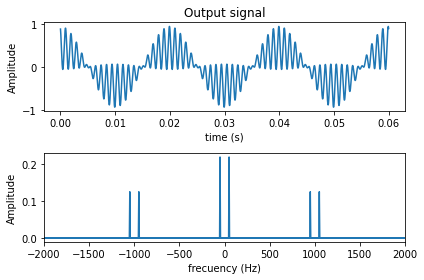

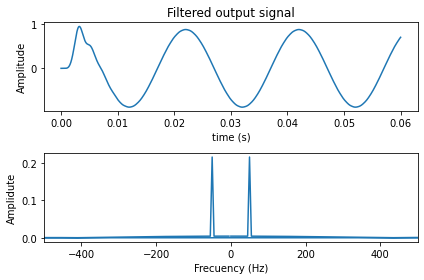

In [ ]:
demodulacion_mod(modulada, modulada_tf, t, tf, frec, N, 0, 0.5, fc, A)

Como se observa, la afectaci√≥n por desface es peque√±a, la se√±al demodulada casi no sufri√≥ ning√∫n cambio significativo.

Luego, se har√° la prueba con una modificaci√≥n m√°s grande en el desface, esta vez _‚àÜùúî=0 y ùúÉ=1.5_:

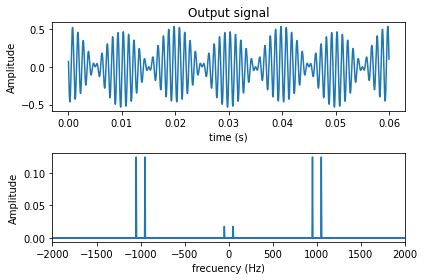

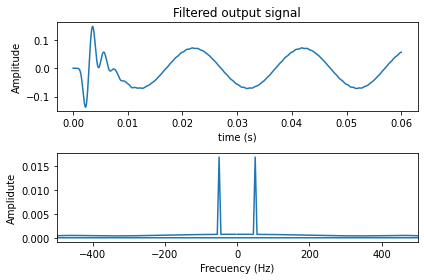

In [ ]:
demodulacion_mod(modulada, modulada_tf, t, tf, frec, N, 0, 1.5, fc, A)

Como se observa en las gr√°ficas de tiempo y frecuencia, la se√±al demodulada sufri√≥ un cambio significativo en el primer ciclo pero luego la distorci√≥n fue peque√±a, lo cual es un √≠ndice de que el mensaje est√° levemente modificado pero es totalmente recuperable. 

Luego se har√° una modificaci√≥n de la frecuencia y se analizar√°n los resultados, el primer caso de modificaci√≥n  de frecuencia se modificar√° en 5 su magnitud. 

_‚àÜùúî=5 y ùúÉ=0_:

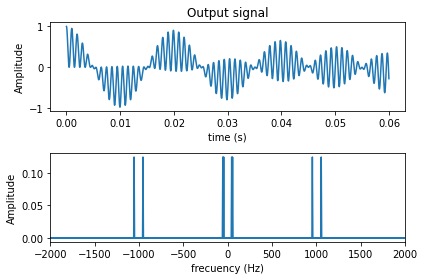

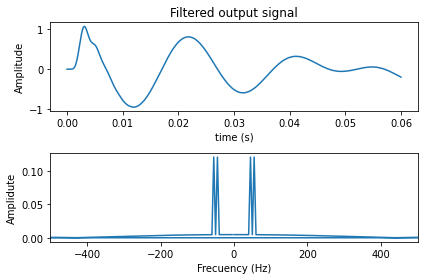

In [ ]:
demodulacion_mod(modulada, modulada_tf, t, tf, frec, N, 5, 0, fc, A)

En este caso se observa que con una modificaci√≥n peque√±a de la frecuencia, el mensaje demodulado est√° muy distorcionado en comparaci√≥n con el original, de hecho, si se observa la se√±al filtrada en frecuencia, se puede notar que existen dos frecuencias diferentes, cuando deber√≠a haber solo 1. 

finalmente se modificar√° m√°s a√∫n la frecuencia como sigue. 

‚àÜùúî=20 y ùúÉ=0:

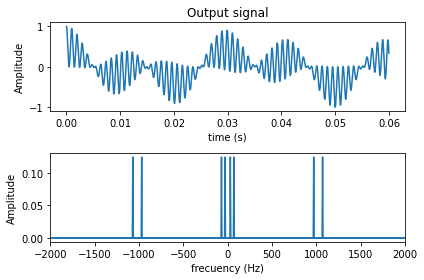

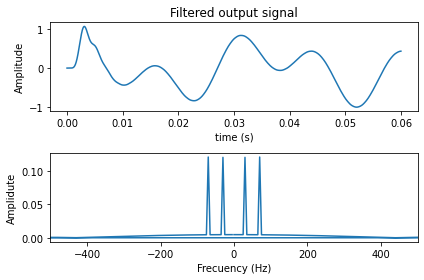

In [ ]:
demodulacion_mod(modulada, modulada_tf, t, tf, frec, N, 20, 0, fc, A)

En este caso se observa que la se√±al filtrada est√° totalmente distorcionada y que en el dominio de la frecuencia existen 2 frecuencias bien separadas y definidas cuando deber√≠a haber solamente 1. 

## Modulador b√°sico AM DSB-LC

En esta secci√≥n se crear√° una funci√≥n para el bloque modulador AM DBC-LC, se analizar√° la funci√≥n de factor de modulaci√≥n ùúá.

En cuanto al proceso de modulaci√≥n  por AM DSB_LC es diferente al m√©todode AM DSB-SC ya que se utiliza la siguiente manera:

* _s(t) = A<sub>c</sub>*cos<sup>2</sup>(2œÄf<sub>c</sub>‚ãÖ t)+K<sub>a</sub>*A<sub>c</sub>cos(2œÄf<sub>c</sub>‚ãÖ t)cos(2œÄf<sub>m</sub>‚ãÖ t)_

El valor de K<sub>a</sub> es conocido como sensibilidad de amplitud, y el termino K<sub>a</sub>*A<sub>m</sub> es el que se conoce como factor de modulaci√≥n ùúá.

Posteriormente, al aplicar las identidades apropiadas queda algo similar a lo siguiente:

* * _s(t)_ = _A<sub>c</sub>cos(2œÄf<sub>c</sub>‚ãÖ t)+(A<sub>c</sub>*ùúá)/2(cos(2œÄt(f<sub>m</sub>+f<sub>c</sub>)+(cos(2œÄt(f<sub>m</sub>-f<sub>c</sub>))_

En este caso se ir√° variando el vaor de ùúá y se registrar√° aquellos valores en los que ùúá no afecta la se√±al, en el que afecta levemente la se√±al y en el que distorciona completamente la se√±al, tanto que existe una alta sobre modulaci√≥n. 

A continuaci√≥n se muestra el bloque de modulaci√≥n:

In [4]:
def modulation_lc(fm, fc, ac, ka):
  # definici√≥n de funciones matem√°ticas 

  # espacio entre muestras
  s = 1/(fc*200)

  # puntos de muestra
  t = np.arange(0, 30/fc, s)     # puntos en t
  tf = np.arange(0, 100/fc, s)   # puntos en t para transformar a frecuencia 

  # numero muestras para frecuencia 
  N = len(tf)
  frec = fftfreq(N, s)           # se√±al de frecuencia 
  mt = np.cos(2*np.pi*fm*t)      # se√±al moduladora en el tiempo
  portadora = ac*np.cos(2*np.pi*fc*t) # se√±al portadora  en el tiempo
  modulada = portadora + ka*mt*portadora             # se√±al modulada en el tiempo

  %matplotlib inline
    #(\u03C9)
  # se√±al moduladora en el tiempo
  fig, (ax1, ax2) = plt.subplots(2)
  ax1.plot(t, mt, label = "modulating")
  ax1.set_ylabel("Amplitude")
  ax1.set_xlabel("time (s)")
  ax1.set_title('Modulating signal') 

  #se√±al moduladora en frecuencia 
  mtf= np.cos(2*np.pi*fm*tf)      # se√±al moduladora en el tiempo para frecuencia 
  mf = fft(mtf)                   # moduladora en frecuencia
  ax2.plot(frec, 1/N * np.abs(mf))
  ax2.set_xlim([-1000, 1000])
  ax2.set_ylabel("Amplitude")
  ax2.set_xlabel("frecuency (Hz)")
  #ax2.set_title('Modulating signal') 
  plt.tight_layout()
  plt.show()

  # Se√±al portadora en tiempo 
  fig, (ax1, ax2) = plt.subplots(2)
  ax1.plot(t, portadora, label = "Carrier")
  ax1.set_ylabel("Amplitude")
  ax1.set_xlabel("time (s)")
  ax1.set_title('Carrier signal') 

  #se√±al portadora en frecuencia 
  portadora_f = ac*np.cos(2*np.pi*fc*tf) # se√±al portadora  para frecuencia 
  pf = fft(portadora_f)                   # portadora en frecuencia
  ax2.plot(frec, 1/N * np.abs(pf))
  ax2.set_xlim([-1000, 1000])
  ax2.set_ylabel("Amplitude")
  ax2.set_xlabel("frecuency (Hz)")
  #ax2.set_title('Carrier signal') 
  plt.tight_layout()
  plt.show()

  # se√±al modulada en el tiempo 
  fig, (ax1, ax2) = plt.subplots(2)
  ax1.plot(t, modulada , label = "modulated")
  ax1.set_ylabel("Amplitude")
  ax1.set_xlabel("time (s)")
  ax1.set_title('Modulated signal') 
  # se√±al modulada en frecuencia 
  modulada_tf = portadora_f+ka*mtf*portadora_f # se√±al modulada para frecuencia 
  modulada_f = fft(modulada_tf)                   # portadora en frecuencia
  ax2.plot(frec, 1/N * np.abs(modulada_f))
  ax2.set_xlim([-1000, 1000])
  ax2.set_ylabel("Amplitude")
  ax2.set_xlabel("frecuency (Hz)")
  ax2.set_title('Modulated signal') 
  plt.tight_layout()
  plt.show()

  # Vista de tres se√±ales en el tiempo 
  plt.plot(t, mt , label = "modulating")
  plt.plot(t, portadora , label = "carrier")
  plt.plot(t, modulada , label = "modulated")
  plt.legend()
  plt.ylabel("Amplitude")
  plt.xlabel("time (s)")
  plt.title('Modulation signals') 
  fig.show()

  return 

### Pruebas con diversos valores de ùúá.

Con ùúá = 0.1

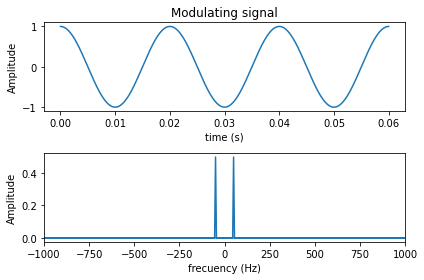

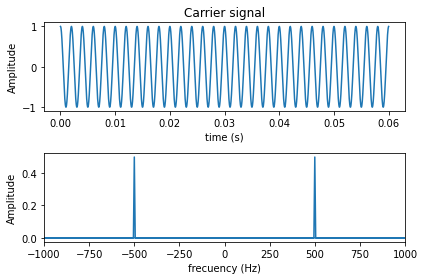

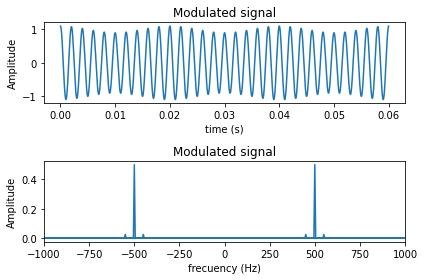

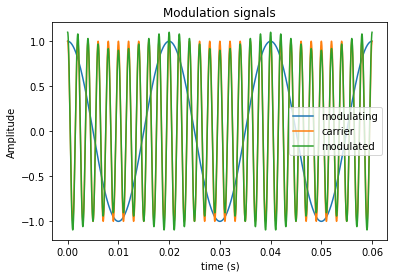

In [ ]:
fm = 50
fc = 500
A = 1
ka = 0.1

modulation_lc(fm, fc, A, ka)

Con un valor de 0.1 la envolvente de la se√±al modulada casi no se percibe, sin embargo, no existe sobremodulaci√≥n alguna en la se√±al, ya que la forma de la envolvente es una se√±al sinusoidal.

Con ùúá =0.5

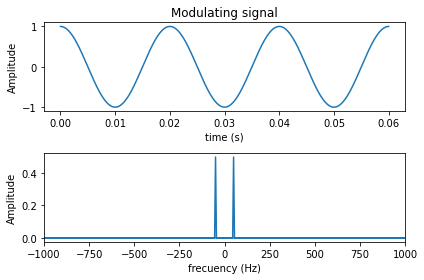

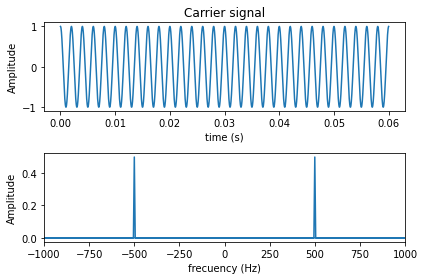

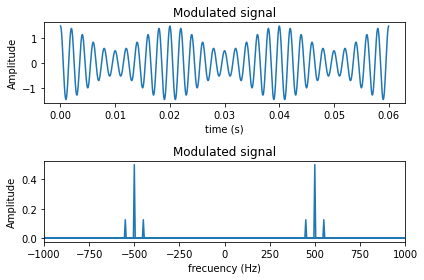

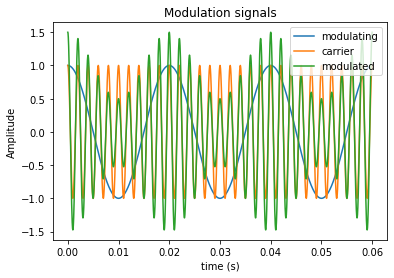

In [ ]:
fm = 50
fc = 500
A = 1
ka = 0.5

modulation_lc(fm, fc, A, ka)

Con el valor anterior de ùúá, la envolvente de la se√±al modulada, presenta osiclaciones que se asemejan a la se√±al moduladora por lo que, es un valor adecuado para eliminar los efectos de sobre modulaci√≥n. Adem√°s, se observa que la se√±al modulada solo tiene las frecuencias de la se√±al moduladora y la portadora, no tiene otras frecuencias extra.

Con ùúá =1

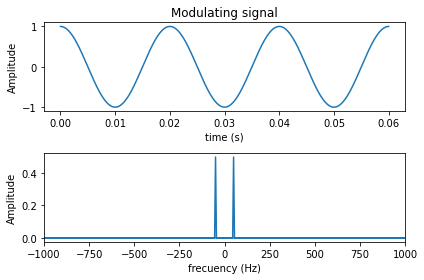

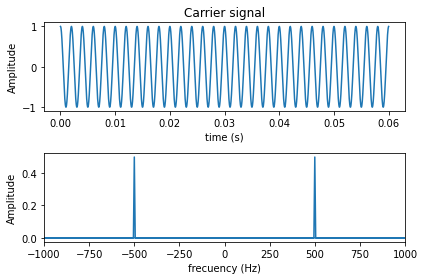

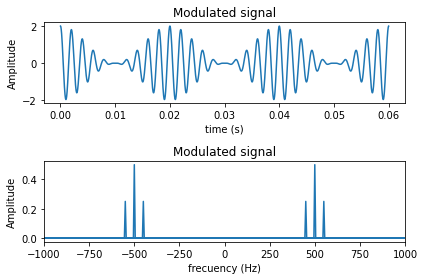

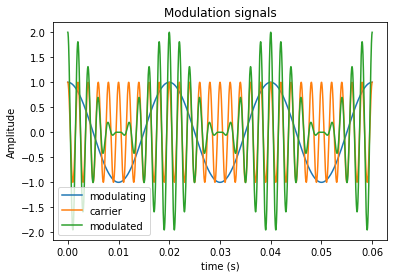

In [ ]:
fm = 50
fc = 500
A = 1
ka = 1

modulation_lc(fm, fc, A, ka)

Con el valor de 1 se incurre en leves problemas de sobremodulaci√≥n.

* Prueba con ùúá = 2: 

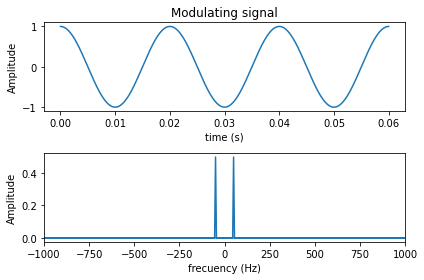

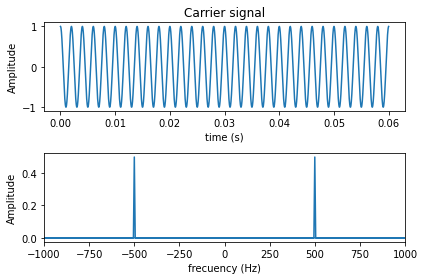

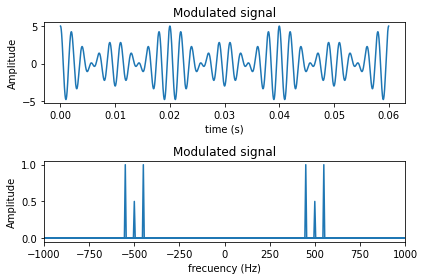

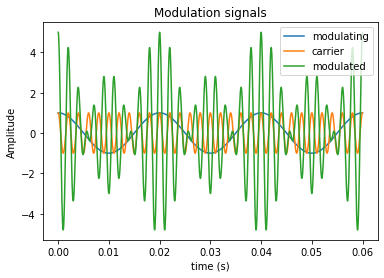

In [5]:
fm = 50
fc = 500
A = 1
ka = 4

modulation_lc(fm, fc, A, ka)

Con un valor de ùúá de 4 se tiene una se√±al modulada con una envolvente que no se asemeja a la se√±al moduladora. Adem√°s, la se√±al modulada posee variaciones fuertes de amplitud de un tramo a otro. Por lo que se puede indicar, que este es un caso de sobremodulaci√≥n. 

En el dominio de la frecuencia, se tienen 6 deltas de dirac en total ubicados en ¬±(f<sub>m</sub>+f<sub>c</sub>), ¬±(f<sub>m</sub>-f<sub>c</sub>) y ¬±(f<sub>c</sub>), donde es posible observar que las frecuencia de la portadora,se encuentra presente. No como en el m√©todod anterior, que la portadora se suprime. Para la amplitud de la portadora se convierte en A<sub>c</sub>/2 y para las demas amplitudes se tiene que (A<sub>c</sub>*ùúá)/4.

Por lo que se ha demostrado para valores de ùúá que cumplan con 0<ùúá<1  son los valores donde no hay sobremodulaci√≥n.